<a href="https://colab.research.google.com/github/pparutto/BINF2025_TP6/blob/main/BINF2025_tp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BINF TP6 : bases de données métaboliques et rdkit

Les bases de données métaboliques stockent des informations sur les composés et réaction chimiques présentes chez différents organismes ainsi que les enzymes associées. rdkit est une bibliothèque de manipulation de composés et réactions chimiques.

Installons rdkit :

In [1]:
!pip install rdkit

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 5.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


## Exercice 1 : Base de données Kegg et visualisation du cycle TCA

[https://www.genome.jp/kegg/](https://www.genome.jp/kegg/)

1. Utilisez le module «pathway » de la base de donnes Kegg pour visualiser le cycle de l’acide citrique. Appelé en anglais : TCA cycle, citric acid cycle ou encore Krebs cycle.
2. Combien de reactions contient-il ? On s'intéresse uniquement aux réactions du cycle contenant l'acide citrique.

Le cycle qui contient l'acide citrique contient 21 cycles. 18 sans les doublons. (correction: 9)

3. Quels sont les identifiants EC (E.C numbers) associes à chacune de ces réactions.

- 1.1.1.42
- 1.1.1.42
- 1.1.1.41
- 4.2.1.3
- 4.2.1.3
- 2.3.3.1
- 2.3.3.3
- 2.3.3.5
- 1.1.1.37
- 1.1.5.4
- 4.2.1.2
- 1.3.5.1
- 6.2.1.4
- 6.2.1.5
- 2.8.3.18
- 2.3.1.61
- 1.2.4.2
- 1.8.1.4
- 1.2.4.2
- 1.2.7.11
- 1.2.7.3

4. Pourquoi certains identifiants EC sont-ils en double ?

Si certains identifiants EC sont en double, cela veut dire qu'il y a plusieurs fois la même réaction dans le cycle TCA. (correction: soit même réaction, soit truc bizarre)

5. Qu’observez-vous de plus à propos de ces EC numbers ?

correction : on peut voir des réactions différentes --> réactions qui appartiennent à 4 familles de réaction différentes (1, 2, 4 et 6)

Malheureusement la base de données KEGG ne peut pas être téléchargée gratuitement, nous allons donc changer de base de données.

## Exercice 2 : Base de données Rhea et visualisation du cycle TCA

[https://www.rhea-db.org/](https://www.rhea-db.org/)

A L’inverse, la base de données Rhea est téléchargeable, mais elle ne fournit pas de visualisation des voies métaboliques. C’est pour ça que l’on a fait la partie précédente avec KEGG.


1. Trouvez les IDs Rhea associés aux EC numbers extraits dans l'exercice précédent. Faites attention à choisir des réactions unidirectionnelles. Si vous avez l’id d’une réaction bidirectionnelle, id+1 et id+2 devraient correspondre aux réactions décomposées dans chaque sens. Faites attention au sens de réaction.

- 1.1.1.41 : RHEA:23632
- 1.1.1.42 : RHEA:19629
- 4.2.1.3 : RHEA:10336
- 2.3.3.3 : RHEA:16845
- 2.3.3.1 : RHEA:16845
- 2.3.3.5 : RHEA:23780
- 1.1.1.37 : RHEA:21432
- 1.1.5.4 : RHEA:30095 / RHEA:46012
- 4.2.1.2 : RHEA:12460
- 1.3.5.1 : RHEA:27834 / RHEA:40523 / RHEA:75711 / RHEA:13713
- 6.2.1.4 : RHEA:22120
- 6.2.1.5 : RHEA:17661
- 2.8.3.18 : RHEA:35711
- 2.3.1.61 : RHEA:15213
- 1.2.4.2 : RHEA:12188 
- 1.8.1.4 : RHEA:33059
- 1.2.7.11 : RHEA:42316 
- 1.2.7.3 : RHEA:17297

correction : 10337, 19630, 12189, 15215, 22122, 77904, 12462, 21433, 16846

2. Téléchargez Rhea, choisissez le format « rhea-reaction-smiles.tsv ». Quel est ce format ?

Ce format montre des valeurs (ici les SMILES des réactions de Rhea) séparées par des tabulations.

3. Chargez ce fichier via RdKit via "rdChemReactions.ReactionFromSmarts" du module rdkit.Chem

In [6]:
!ls

BINF2025_tp6.ipynb  README.md  rhea-reaction-smiles.tsv


       10001 CCCCC(N)=O.[H]O[H]>>CCCCC(=O)[O-].[H][N+]([H])([H])[H]
0      10002  CCCCC(=O)[O-].[H][N+]([H])([H])[H]>>CCCCC(N)=O...    
1      10005                S=C=NCC1=CC=CC=C1>>N#CSCC1=CC=CC=C1    
2      10006                N#CSCC1=CC=CC=C1>>S=C=NCC1=CC=CC=C1    
3      10009  *OO.*N[C@@H](CS)C(*)=O.*N[C@@H](CS)C(*)=O>>*N[...    
4      10010  *N[C@@H](CSSC[C@H](N*)C(*)=O)C(*)=O.*O.[H]O[H]...    
...      ...                                                ...    
34570  83545  O=C([O-])C1=CC=NC=C1.*N[C@@H](CCCC[NH3+])C(*)=...    
34571  83548  C=C(C)C(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP...    
34572  83549  *N[C@@H](CCCCNC(=O)C(=C)C)C(*)=O.CC(C)(COP(=O)...    
34573  83552  *N[C@@H](CCCCNC(=O)C(=C)C)C(*)=O.[H]O[H]>>C=C(...    
34574  83553  C=C(C)C(=O)[O-].*N[C@@H](CCCC[NH3+])C(*)=O>>*N...    

[34575 rows x 2 columns]


/tmp/ipykernel_3032/523443288.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rdC.rdChemReactions.ReactionFromSmarts(df.iloc(0)[0][1])


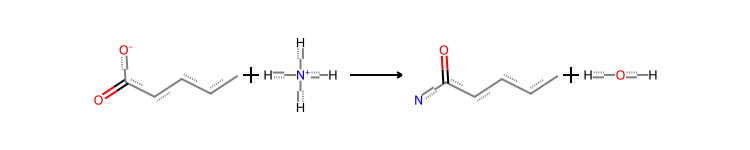

In [23]:
import rdkit.Chem as rdC
import pandas as pd

# Load file
df=pd.read_csv('rhea-reaction-smiles.tsv',sep='\t')
print(df)
#print(df.iloc(0)[0][0])
rdC.rdChemReactions.ReactionFromSmarts(df.iloc(0)[0][1])

4. Cherchez dans ces réactions celles associées au cycle TCA en vous basant sur l’ID Rhea.

      10001 CCCCC(N)=O.[H]O[H]>>CCCCC(=O)[O-].[H][N+]([H])([H])[H]
4435  19630  O=C([O-])C[C@H](C(=O)[O-])[C@@H](O)C(=O)[O-].N...    


/tmp/ipykernel_3032/3095984707.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rdC.rdChemReactions.ReactionFromSmarts(df.iloc(0)[161][1])
/tmp/ipykernel_3032/3095984707.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rdC.rdChemReactions.ReactionFromSmarts(df.iloc(0)[4435][1])


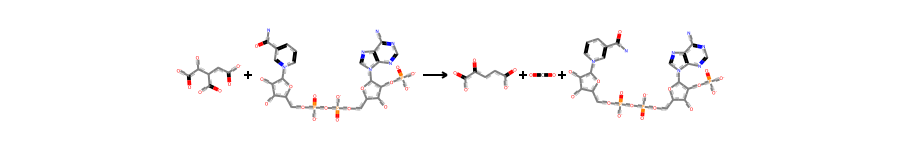

In [34]:
#print(df[df['10001'] == 19630])
#print(df.iloc(0)[161][1])
rdC.rdChemReactions.ReactionFromSmarts(df.iloc(0)[161][1])
rdC.rdChemReactions.ReactionFromSmarts(df.iloc(0)[4435][1])

5. Affichez les réactions du cycle TCA, vous pouvez utiliser la fonction display de « IPython.display » sur une réaction, vous devez aussi importer

« from rdkit.Chem.Draw import IPythonConsole »

/tmp/ipykernel_3032/3319746507.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(rdC.rdChemReactions.ReactionFromSmarts(df.iloc(0)[4435][1]))


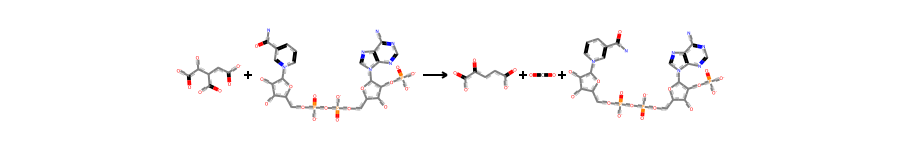

In [38]:
from rdkit.Chem.Draw import IPythonConsole
display(rdC.rdChemReactions.ReactionFromSmarts(df.iloc(0)[4435][1]))


## Exercice 3 : RdKit

1.	Pour se familiariser avec Rdkit et le format MOL nous allons faire un parser de MOL.
Ecrire la fonction load_mol(fname: str) -> Chem.Mol qui prend un fichier mol en entrée et retourne la molécule associée au format Mol de RdKit.
Utilisez Chem.Mol, Chem.EditableMol, m.AddAtom, m.AddBond

In [ ]:
print("votre code ici !!")


2.	Ecrire la fonction raw_formula(m: Chem.Mol) -> str qui retourne la formule brute de la molécule m.
Utilisez GetAtoms sur une molécule pour récupérer les listes des atomes et GetSymbol sur un atome pour récupérer son symbole.

In [ ]:
print("votre code ici !!")

3.	Récupérez les smiles et inchi de la molécule "citrulline" à partir des bases de données Rhea et pubchem. Puis :

* Comparez les Smiles ;
* Chargez les molécules dans rdkit via « Chem.MolFromSmiles» et comparez-les ;
* Comparez les formules brutes généré par votre fonction précédente ;
* Comparez les smiles générés par « Chem.MolToSmiles » ;
* Testez la méthode « m.HasSubstructMatch(m2) ».

In [ ]:
print("votre code ici !!")

4.	A quelle molécule correspond ce smiles :

C[NH2+] [C@H] 1[C@H] (O) [C@@H] (O) [C@H] (CO) O[C@H] 1O[C@H] 1[C@@H] (O[C@@H] (C) [C@] 1(O) CO) O[C@H] 1[C@H] (O) [C@@H] (OP([O- ] ) ([O- ] ) =O) [C@H] (NC(N) =[NH2+] ) [C@@H] (O) [C@@H] 1NC(N) =[NH2+]

votre réponse ici!